<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/MLWeek7_RegresiBoston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Membaca dataset langsung dari URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Menampilkan lima baris pertama
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Memisahkan fitur (X) dan target (y)
# Target adalah kolom 'medv' (median value of owner-occupied homes)
X = data.drop('medv', axis=1)
y = data['medv']

# Membagi data menjadi data latih dan uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model Random Forest Regressor
bagging_model = RandomForestRegressor(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_bagging = bagging_model.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# Menampilkan hasil evaluasi
print("Evaluasi Model Bagging (Random Forest):")
print(f"MSE: {mse_bagging}")
print(f"RMSE: {rmse_bagging}")
print(f"R-Squared: {r2_bagging}")

Evaluasi Model Bagging (Random Forest):
MSE: 7.901513892156864
RMSE: 2.8109631609391226
R-Squared: 0.8922527442109116


In [ ]:
# Membuat model Gradient Boosting Regressor
boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_boosting = boosting_model.predict(X_test)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)
rmse_boosting = np.sqrt(mse_boosting)
r2_boosting = r2_score(y_test, y_pred_boosting)

# Menampilkan hasil evaluasi
print("Evaluasi Model Boosting (Gradient Boosting):")
print(f"MSE: {mse_boosting}")
print(f"RMSE: {rmse_boosting}")
print(f"R-Squared: {r2_boosting}")

Evaluasi Model Boosting (Gradient Boosting):
MSE: 6.208861361528038
RMSE: 2.491758688462436
R-Squared: 0.9153342280466539


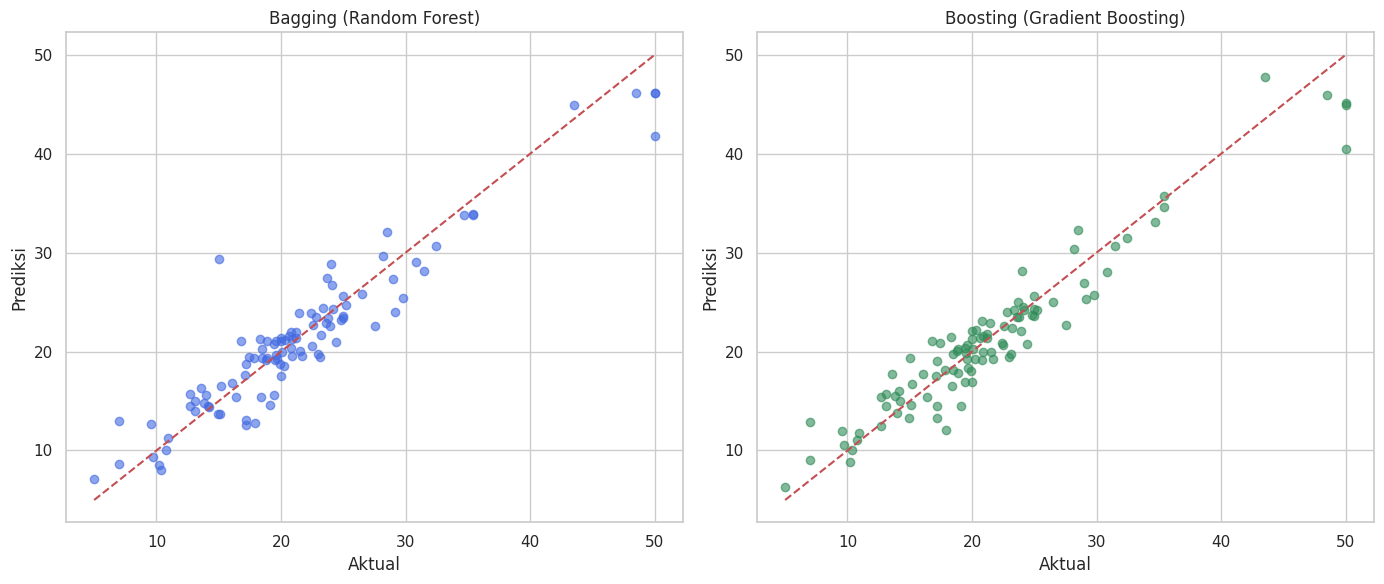

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visual
sns.set(style="whitegrid")

# Membuat figure
plt.figure(figsize=(14, 6))

# Plot Bagging
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_bagging, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Bagging (Random Forest)")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")

# Plot Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_boosting, color='seagreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Boosting (Gradient Boosting)")
plt.xlabel("Aktual")
plt.ylabel("Prediksi")

plt.tight_layout()
plt.show()

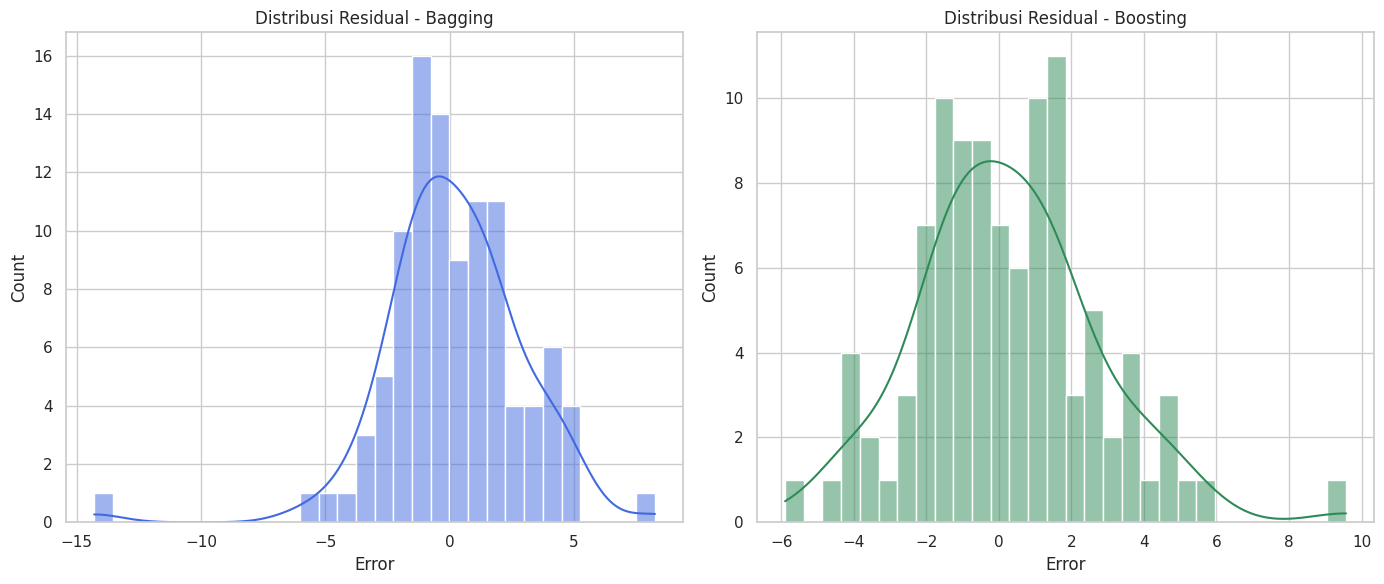

In [ ]:
# Membuat figure
plt.figure(figsize=(14, 6))

# Residual Bagging
plt.subplot(1, 2, 1)
residuals_bagging = y_test - y_pred_bagging
sns.histplot(residuals_bagging, bins=30, kde=True, color='royalblue')
plt.title("Distribusi Residual - Bagging")
plt.xlabel("Error")

# Residual Boosting
plt.subplot(1, 2, 2)
residuals_boosting = y_test - y_pred_boosting
sns.histplot(residuals_boosting, bins=30, kde=True, color='seagreen')
plt.title("Distribusi Residual - Boosting")
plt.xlabel("Error")

plt.tight_layout()
plt.show()

## Penjelasan Matematis Evaluasi Model

### Mean Squared Error (MSE)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$
MSE adalah rata-rata dari kuadrat selisih antara nilai aktual dan nilai prediksi. MSE digunakan untuk mengukur seberapa besar kesalahan model.

### Root Mean Squared Error (RMSE)
$$
RMSE = \sqrt{MSE}
$$
RMSE merupakan akar kuadrat dari MSE dan digunakan untuk memberikan interpretasi yang lebih mudah karena satuannya sama dengan target.

### R-Squared (R²)
$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$
R² menunjukkan seberapa baik model menjelaskan variansi dari data target. Nilai mendekati 1 menandakan model yang baik.

### Bagging
Bagging (Bootstrap Aggregating) adalah teknik ensemble yang melatih banyak model secara paralel pada subset data yang berbeda, kemudian menggabungkan hasil prediksi.

### Boosting
Boosting adalah teknik ensemble yang melatih model secara berurutan, di mana setiap model bertujuan untuk memperbaiki kesalahan dari model sebelumnya.